In [1]:
import numpy as np
from RandomForest import RandomForest
from SOMAC import SOMAC
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
filename = "../data/joint_datasets.npy"

data = np.load(filename, encoding = "latin1").item()

tkeys = np.array(list(data.keys()))
n = len(tkeys)

train_keys = tkeys[: n - 116]
test_keys = tkeys[n - 116 :]

#for t in tkeys:
#    if np.random.rand() < 0.7:
#        train_keys.append(t)
#    else:
#        test_keys.append(t)
        
train = {}
for i, t in zip(range(len(train_keys)), train_keys):
    train[i] = data[t]
train_file = "./_tmp/train_file.npy"
np.save(train_file, train)

test = {}
for i, t in zip(range(len(test_keys)), test_keys):
    test[i] = data[t]
test_file = "./_tmp/test_file.npy"
np.save(test_file, test)

print("Train set size = {}, Test set size = {}".format(len(train_keys), len(test_keys)))

Train set size = 6407, Test set size = 116


In [3]:
test_data = np.load(test_file, encoding = "latin1").item()

In [4]:
# somac = SOMAC(reg_csma = RandomForest(), reg_tdma = EsembleNNet())
# EsembleNNet(n_new_estimators = 10, n_neurons = 3)
somac = SOMAC(reg_csma = RandomForest(n_estimators = 100, max_depth = 5, max_features = "log2", n_new_estimators = 0),
              reg_tdma = RandomForest(n_estimators = 100, max_depth = 5, max_features = "log2", n_new_estimators = 0))
somac.train(train_file)

In [5]:
err_csma = []
err_tdma = []

y_csma = []
y_tdma = []

for t in range(len(test_keys)):
    prot, gain, y_hat_csma, y_hat_tdma = somac.decision(test_data[t])
    y = test_data[t]["metrics"][0, 1]
    prot = test_data[t]["prot"]
    
    if prot == 0:
        err_csma.append(np.abs(float(y_hat_csma - y)))
        y_csma.append(float(y))
    else:
        err_tdma.append(np.abs(float(y_hat_tdma - y)))
        y_tdma.append(float(y))

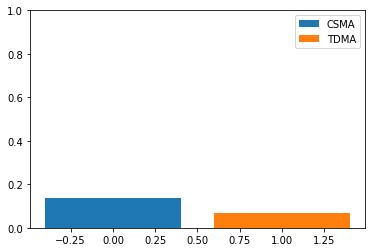

In [6]:
plt.bar(0, np.mean(err_csma) / np.mean(y_csma))
plt.bar(1, np.mean(err_tdma) / np.mean(y_tdma))
plt.ylim([0, 1])
plt.legend(["CSMA", "TDMA"])

(0, 1)

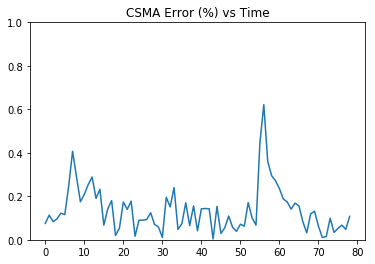

In [7]:
plt.plot(err_csma / np.mean(y_csma))
plt.title("CSMA Error (%) vs Time")
plt.ylim([0, 1])

(0, 1)

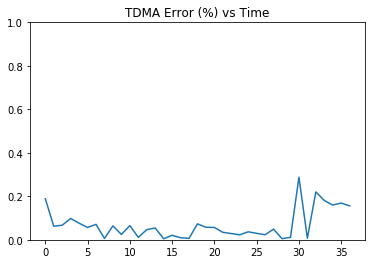

In [8]:
plt.plot(err_tdma / np.mean(y_tdma))
plt.title("TDMA Error (%) vs Time")
plt.ylim([0, 1])